#ANALIZA

kle das opis

poves iz kje pobiras dol pa kaj pa eni so vekrat napisani k so pr vec ekipah

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")

nba = pd.read_csv('NBA.csv', encoding="utf-8")
nba = nba.drop_duplicates(keep=False)       #da se zbisejo une vrstice
nba

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
759,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
760,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
761,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


zbrisemo te stolpce kr bomo pol mogoc to sami zracunal

In [44]:
nba = nba.drop(columns=["FG%", "3P%", "2P%", "eFG%", "FT%"])

mormo popraut podatke kr ce ne nc ne dela

In [45]:
NUMERIC_COLS = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 
       '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

nba_num = nba[NUMERIC_COLS]

nba_num = nba_num.apply(pd.to_numeric, errors='coerce').fillna(nba_num) # pretvorimo numerične iz str v stevilke



# dodamo numerične nazaj
nba[NUMERIC_COLS] = nba_num 

nba.dtypes

Rk         object
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
3P        float64
3PA       float64
2P        float64
2PA       float64
FT        float64
FTA       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

zdej je kul tkoda loh normalno delamo naprej
najprej pogledamo kaj nm da top 10

In [46]:
nba.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,1.5,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,1.7,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,1.4,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,5.5,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.7,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
5,3,Ochai Agbaji,SG,23,UTA,51,10,19.7,2.1,4.9,...,0.4,0.7,1.8,2.5,0.9,0.5,0.6,0.7,1.3,5.4
6,3,Ochai Agbaji,SG,23,TOR,27,18,23.6,2.7,6.8,...,1.3,1.4,1.9,3.3,1.3,0.7,0.6,1.1,1.9,6.7
7,4,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,...,1.4,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
8,5,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,...,0.8,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
9,6,Grayson Allen,SG,28,PHO,75,74,33.5,4.5,9.1,...,2.0,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5


vidmo da so urejeni po abecedi kar nm nc ne pomaga tkoda jih razvrstimo po tockah

In [47]:
urejeni_tocke = nba.sort_values(['PTS'], ascending=False).head(15)
urejeni_tocke[["Player", "PTS", "Tm"]]

,Player,PTS,Tm
193,Joel Embiid,34.7,PHI
177,Luka Dončić,33.9,DAL
14,Giannis Antetokounmpo,30.4,MIL
243,Shai Gilgeous-Alexander,30.1,OKC
112,Jalen Brunson,28.7,NYK
83,Devin Booker,27.1,PHO
186,Kevin Durant,27.1,PHO
654,Jayson Tatum,26.9,BOS
471,Donovan Mitchell,26.6,CLE
214,De'Aaron Fox,26.6,SAC


poglejmo keri majo najvec trojk na tekmo

In [48]:
#urejene_trojke = nba.sort_values(['3P','G'], ascending=False).head(15)
#urejene_trojke[['Player','3P','G']]

pogledamo keri igralci so u tej sezoni igral za dallas in jih razvrstimo po minutah na igriscu na tekmo to morm ugotovit se kako

In [49]:
mavs = nba[nba['Tm'].str.contains('DAL')]
mavs[["Player"]]

,Player
104,Greg Brown III
156,Seth Curry
163,Dexter Dennis
177,Luka Dončić
198,Dante Exum
218,Alex Fudge
225,Daniel Gafford
265,Josh Green
276,Tim Hardaway Jr.
278,Jaden Hardy


pogledamo kako so razporejeni po starostih

Text(0.5, 1.0, 'Igralci po starosti')

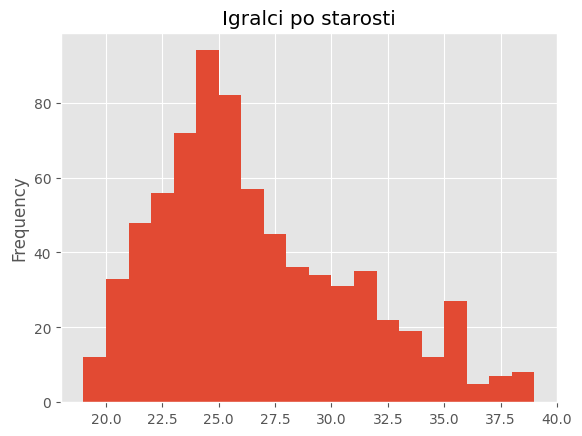

In [50]:
nba["Age"].plot.hist(bins=20)
#plt.xticks(np.arange(0,10))
plt.title("Igralci po starosti")

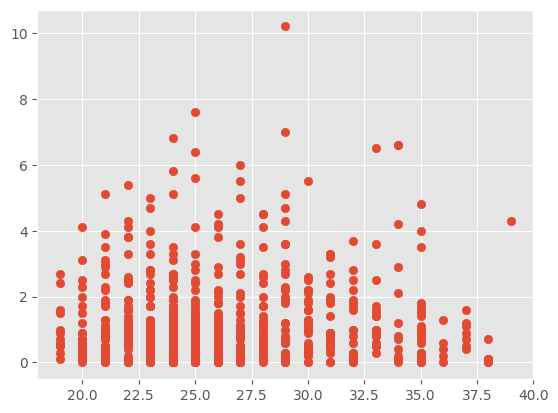

In [51]:
plt.scatter(nba["Age"], nba["FT"])
#kle najd ene druge stvari za primerjat te nc ne povejp

In [52]:
stevilo_tock_po_ekipah = nba.groupby('Tm').size()
stevilo_tock_po_ekipah.to_frame(name='Pts').sort_values(by='Pts', ascending=False)
#nism se fiks kaj mi tej podatki povejo

,Pts
Tm,
TOT,78
MEM,33
DET,31
TOR,30
PHI,28
CHO,26
NYK,26
WAS,24
DAL,22
